In [1]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dlib

  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Running setup.py clean for dlib
Failed to build dlib
    Running setup.py install for dlib: started
    Running setup.py install for dlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\82103\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\82103\\AppData\\Local\\Temp\\pip-install-7t2nv7ei\\dlib_4aab861e7d0c43cabaaa65d684db3a51\\setup.py'"'"'; __file__='"'"'C:\\Users\\82103\\AppData\\Local\\Temp\\pip-install-7t2nv7ei\\dlib_4aab861e7d0c43cabaaa65d684db3a51\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\82103\AppData\Local\Temp\pip-wheel-hklj2_wm'
       cwd: C:\Users\82103\AppData\Local\Temp\pip-install-7t2nv7ei\dlib_4aab861e7d0c43cabaaa65d684db3a51\
  Complete output (58 lines):
  running bdist_wheel
  running build
  running build_py
  package init file 'tools\python\dlib\__init__.py' not found (or not a regular file)
  running build_ext
  Building extension for Python 3.8.8 (default, Apr 13 2021, 15:08

In [3]:
pip install face_recognition --user

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Running setup.py clean for dlib
Failed to build dlib
    Running setup.py install for dlib: started
    Running setup.py install for dlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\82103\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\82103\\AppData\\Local\\Temp\\pip-install-h00kenc5\\dlib_ce3cdbbcd25e41f68a4a4b15247f1444\\setup.py'"'"'; __file__='"'"'C:\\Users\\82103\\AppData\\Local\\Temp\\pip-install-h00kenc5\\dlib_ce3cdbbcd25e41f68a4a4b15247f1444\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\82103\AppData\Local\Temp\pip-wheel-2uebktqt'
       cwd: C:\Users\82103\AppData\Local\Temp\pip-install-h00kenc5\dlib_ce3cdbbcd25e41f68a4a4b15247f1444\
  Complete output (58 lines):
  running bdist_wheel
  running build
  running build_py
  package init file 'tools\python\dlib\__init__.py' not found (or not a regular file)
  running build_ext
  Building extension for Python 3.8.8 (default, Apr 13 2021, 15:08

In [9]:
# 필요 module import
import os
# import face_recognition
import numpy as np
import matplotlib.pyplot as plt


file_list: ['000001.jpg', '000002.jpg', '000003.jpg', '000004..jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019..jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037..jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063..jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000

TypeError: Image data of dtype <U83 cannot be converted to float

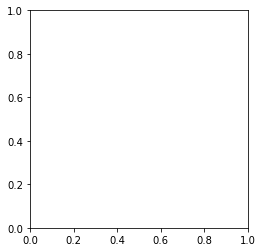

In [12]:
# directory의 file list 불러오기
dir_path = 'C:/Users/82103/Documents/Deep daiv/deep_learning_wiki/youtuber_alike/ojy'
file_list = os.listdir(dir_path)
print ("file_list: {}".format(file_list))


# 임베딩 벡터 구하기
image_file = os.path.join(dir_path, '000001.jpg')

# 이미지 확인
%matplotlib inline

plt.imshow(image_file)

In [ ]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(cropped_face)  
embedding

# embedding dict 만드는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            # splitext = file, extension
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face

    return embedding_dict, cropped_dict

# embedding_dict 만들기
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)
embedding_dict['내사진']

# 두 얼굴 사이의 거리 구하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# 내 사진으로 비교
get_distance('내사진','내사진1')

# name1과 name2의 거리를 비교하는 함수
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 거리를 비교할 name1 미리 지정
sort_key_func = get_sort_key_func('내사진')

# 순위에 맞는 이미지 출력
def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 1)
    plt.imshow(cropped_dict[sorted_faces[0][0]])
    for i in range(1, top+1):
        fig.add_subplot(2, top, i+5)
        plt.imshow(cropped_dict[sorted_faces[i][0]])

# 가장 닮은 꼴 찾기
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print(f'순위 {i} : 이름 ({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])})')
    return sorted_faces

# 순위 출력
sorted_faces = get_nearest_face('내사진')